## Neural Network

- pip install tensorflow
- pip install keras

In [24]:
from keras import models, layers

from keras.datasets import mnist

import matplotlib.pyplot as plt 

from tensorflow.keras.utils import to_categorical
import numpy as np

import seaborn as sn 
import tensorflow as tf

from tensorflow.keras.models import load_model

# Loading Dataset

## 1. Variant (Without Proxy)

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

## 2. Variant (With Proxy , WBS)

Download Link : https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [3]:
file_path = "./mnist.npz"
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data(path = file_path)

# Exploring the data

In [4]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Visualize some images

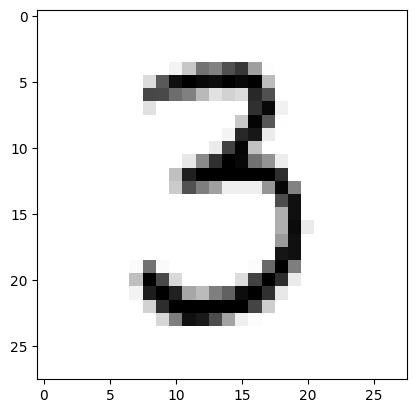

Label:  3


In [5]:

IMAGE_INDEX = 50

digit = train_images[IMAGE_INDEX]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()


print("Label: ", train_labels[IMAGE_INDEX])

# Prepare the training Data

## 1. Reshape the images from 28x28 to 784x 1

In [6]:
train_images = train_images.reshape((60000,784))
print(train_images.shape)


test_images = test_images.reshape((10000,784))
print(test_images.shape)

(60000, 784)
(10000, 784)


## 2. Scale the input values from 0-255 --> 0-1

In [7]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255


## 3. Prepare the labels -> One Hot Encoding

Input : [0 1, 2, 3]

Output:

- [1 0 0 0 ] --> 0
- [0 1 0 0 ] --> 1
- [0 0 1 0 ] --> 2

In [8]:
train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# Build The network

In [9]:
network = models.Sequential()

# We define two things:
# 1. Input layer with 784
# 2. first hidden layer with 512 neorons
network.add(layers.Dense(512, activation= "sigmoid" ,  input_shape = (784,)  ))




# Output Layer
network.add(layers.Dense(10 , activation= "sigmoid"))

# Get Network Summary

In [10]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile / Configure the network

- loss : how bad is my model --> mse, mae, categorical_crossentropy
- optimizer: mechansim to update the weights and biases
- metrics: performance of my model --> accuracy

In [11]:
network.compile(loss = "categorical_crossentropy", optimizer= "rmsprop", metrics = ["accuracy"])

# Training Phase

In [12]:
# network.fit(train_images, train_labels, epochs = 2)
# network.fit(train_images, train_labels, epochs = 2, shuffle = True)
# network.fit(train_images, train_labels, epochs = 2, shuffle = True, validation_data = (test_images, test_labels) ) 
history = network.fit(train_images, train_labels, epochs = 5, shuffle = True, validation_split= 0.1) # 10% validation data


Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3608 - accuracy: 0.8963 - val_loss: 0.2107 - val_accuracy: 0.9367
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1992 - accuracy: 0.9417 - val_loss: 0.1345 - val_accuracy: 0.9640
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1385 - accuracy: 0.9590 - val_loss: 0.1015 - val_accuracy: 0.9722
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1036 - accuracy: 0.9691 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0819 - accuracy: 0.9754 - val_loss: 0.0842 - val_accuracy: 0.9743


# Plot the accuracy

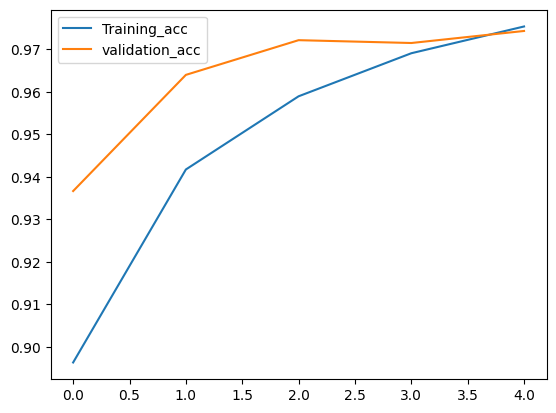

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training_acc", "validation_acc"])
plt.show()

# Predictions using Test Data

In [14]:
predictions = network.predict(x = test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
for i in predictions:
    print(i)

[2.6953145e-10 1.2758497e-11 1.0093819e-08 5.0220490e-07 9.4939603e-12
 1.1390634e-09 4.2838374e-15 1.2441156e-02 4.8424553e-10 7.8601026e-08]
[7.4776793e-08 1.2102812e-05 7.9304785e-02 1.7129922e-05 5.5694040e-13
 1.0309985e-06 1.2616367e-06 1.3495451e-13 3.5610512e-07 7.4556436e-13]
[5.2339148e-14 2.5639372e-05 3.5349201e-09 8.6609597e-10 4.1855051e-11
 3.8013359e-10 2.1551187e-10 3.6291581e-09 5.7377830e-10 2.6311292e-11]
[7.4256971e-02 2.3972635e-09 1.5076702e-06 1.2232503e-07 6.8984647e-08
 1.1339080e-06 7.8595322e-06 1.7207282e-06 2.2324973e-09 1.5081793e-06]
[2.2005398e-10 5.7841655e-13 4.5243116e-09 2.1695857e-11 3.1594856e-04
 6.6187628e-10 2.1240685e-09 2.8756642e-08 4.6606224e-10 2.9444885e-07]
[3.8624667e-13 3.2909558e-04 1.3488632e-09 3.1104064e-09 3.6333328e-10
 9.7400213e-11 1.7760442e-11 5.8002269e-07 5.0114990e-10 9.2360708e-10]
[1.8924753e-12 8.0715282e-11 2.3327915e-10 2.7241384e-10 7.1597206e-03
 8.6230401e-08 8.4144158e-10 1.5505671e-07 3.2156015e-07 1.9514736e-07]

In [16]:
rounded_predictions = np.argmax(predictions, axis = 1) # axis = 1--> through rows

for i in rounded_predictions:
    print(i)

7
2
1
0
4
1
4
9
6
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
7
7
9
2
2
4
1
5
9
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
5
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
4
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
2
9
4
0
6


# Compare between Truth Table and Predicted Data

In [17]:
IMAGES_INDEX = 50

print(test_labels[IMAGES_INDEX])
print(rounded_predictions[IMAGES_INDEX])

6
6


# Confusion Matrix

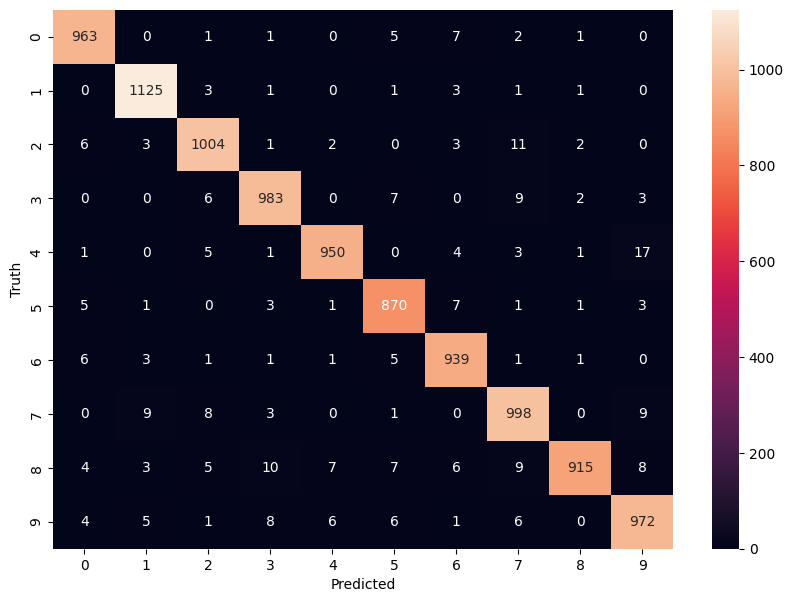

In [22]:
cm = tf.math.confusion_matrix(labels = test_labels, predictions= rounded_predictions)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot= True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Save The model 

 - Archticture
 - Weights and Biases

In [23]:
network.save("./models/mnist_1.h5")

# Load The model

In [25]:
new_model = load_model("./models/mnist_1.h5")

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
